# Introduction
<p>Last Minute is a British company based in london. they are a mix-and-match online travel agent (OTA) offering holidays, 
flights and hotels in destinations all over Europe, as well as in holiday hotspots further afield, such as Florida, Mexico, 
Thailand and the Caribbean. With more than 500,000 hotels to choose from, and thousands of flights, 
this travel company promotes ‘cheap holiday package deals’ and ‘fuss-free booking’.</p>

<ul><strong>Objective of the Project</strong>
    <li> Extract Data from Online source (<strong>uk.trustpilot.com</strong>).</li>and
    <li> Predict Sentiment Analysis to know the public view about last minute services</li>   
</ul>

<strong>NOTE: </strong><p> This Project doesn't represent the view of <strong>'Last Minute Company'</strong>, Its for learning and Presentation purpose.</p> 

# Data Collection

<p> I will be scraping Trustpilot website to generate Dataset for the Sentiment Analysis <p>

### Importing Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<strong>Web URL</strong>

In [3]:
url = 'https://uk.trustpilot.com/'
web = 'https://uk.trustpilot.com/review/www.lastminute.com?page=1'

<strong>Check status Code</strong>

In [4]:
response = requests.get(web)
response

<Response [200]>

<strong>Getting HTML content</strong>

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en-GB"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/manifest.json" rel="manifest"/><meta content="Trustpilot" name="application-name"/><meta content="#1c1c1c" name="theme-color"/><link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="https://cdn.trustpilot.net/brand-assets/1.5.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/1.9.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/><meta content="Trustpilot" name="apple-mobile-web-app-title"/><meta content="#1c1c1c" name="msap

In [6]:
result = soup.find_all('div', {'class': 'styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ'})
result

[<div class="styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"><article class="paper_paper__1PY90 paper_outline__lwsUX card_card__lQWDv card_noPadding__D8PcU styles_reviewCard__hcAvl" data-service-review-card-paper="true"><div class="styles_reviewCardInner__EwDq2"><aside aria-label="Info for Lee " class="styles_consumerInfoWrapper__KP3Ra"><div class="styles_consumerDetailsWrapper__p2wdr"><div class="avatar_avatar__hmBp6 avatar_orange__cwwGs" data-consumer-avatar="true" style="width:44px;min-width:44px;height:44px;min-height:44px"><span class="typography_heading-xs__jSwUz typography_appearance-default__AAY17 typography_disableResponsiveSizing__OuNP7 avatar_avatarName__ehkAr">LE</span></div><a class="link_internal__7XN06 link_wrapper__5ZJEx styles_consumerDetails__ZFieb" data-consumer-profile-link="true" href="/users/5f08a6aedf4f244d808bb850" name="consumer-profile" rel="nofollow" target="_self"><span class="typography_heading-xxs__QKBS8 typography_appearance-default

<strong>Total result on the first Web Page</strong>

In [7]:
len(result)

20

<strong>Getting the first result on the Webpage</strong>

In [8]:
first = result[0]
first

<div class="styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"><article class="paper_paper__1PY90 paper_outline__lwsUX card_card__lQWDv card_noPadding__D8PcU styles_reviewCard__hcAvl" data-service-review-card-paper="true"><div class="styles_reviewCardInner__EwDq2"><aside aria-label="Info for Lee " class="styles_consumerInfoWrapper__KP3Ra"><div class="styles_consumerDetailsWrapper__p2wdr"><div class="avatar_avatar__hmBp6 avatar_orange__cwwGs" data-consumer-avatar="true" style="width:44px;min-width:44px;height:44px;min-height:44px"><span class="typography_heading-xs__jSwUz typography_appearance-default__AAY17 typography_disableResponsiveSizing__OuNP7 avatar_avatarName__ehkAr">LE</span></div><a class="link_internal__7XN06 link_wrapper__5ZJEx styles_consumerDetails__ZFieb" data-consumer-profile-link="true" href="/users/5f08a6aedf4f244d808bb850" name="consumer-profile" rel="nofollow" target="_self"><span class="typography_heading-xxs__QKBS8 typography_appearance-default_

<strong>Items to be Scraped</strong>

In [9]:
# Name
# Date of Review
# Title of Review
# Review Description
# Date of Experience
# Rating

<strong>Name</strong>

In [10]:
name = first.find('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}).get_text()
name

'Lee '

<strong>Date of Review</strong>

In [11]:
date = first.find('p', {'class': 'typography_body-m__xgxZ_ typography_appearance-default__AAY17'}).get_text().strip('Date of experience: ')
date

'19 May 2023'

<strong>Title of Review</strong>

In [12]:
title = first.find('h2', {'class': 'typography_heading-s__f7029 typography_appearance-default__AAY17'}).get_text()
title

'Lovely hotel but .....'

<strong>Review Description</strong>

In [13]:
desc = first.find('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'}).get_text()
desc

"Couldn't fault the hotel or the resort (although we already knew this as we had been there several times before).My major complaint was being allocated seats by Ryanair nowhere near my partner (25 rows apart on the return journey !) I guess this is the price you pay for a late booking. Won't be doing it again."

<strong>Rating</strong>

In [14]:
rating = first.find('div', {'class': 'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'}).find('img').get('alt')
rating

'Rated 3 out of 5 stars'

<strong>Looping through the next 300 Page</strong>

In [15]:
name = []
review_description = []
rating = []
date_posted = []
title = []

for a in range(1, 300):
    
    new_web = 'https://uk.trustpilot.com/review/www.lastminute.com?page='+ str(a)
    
    response = requests.get(new_web)
    
    soup_all = BeautifulSoup(response.content, 'html.parser')
    
    result_all = soup_all.find_all('div', {'class': 'styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ'})
    
    for y in result_all:
        
        try:
            name.append(y.find('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}).get_text())
        except:
            name.append('n/a')
        try:
            review_description.append(y.find('p', {'class': 'typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn'}).get_text())
        except:
            review_description.append('n/a')
        try:
            rating.append(y.find('div', {'class': 'star-rating_starRating__4rrcf star-rating_medium__iN6Ty'}).find('img').get('alt'))
        except:
            rating.append('n/a')
        try:
            date_posted.append(y.find('p', {'class': 'typography_body-m__xgxZ_ typography_appearance-default__AAY17'}).get_text().strip('Date of experience: '))
        except:
            date_posted.append('n/a')
        try:
            title.append(y.find('h2', {'class': 'typography_heading-s__f7029 typography_appearance-default__AAY17'}).get_text())
        except:
            title.append('n/a')

In [16]:
data = {'Name': name, 'Title': title, 'Reviews': review_description, 'Rating': rating, 'Date of Experience': date_posted}

<strong>Converting to Pandas dataframe</strong>

In [17]:
df = pd.DataFrame(data = data)
df.head()

,Name,Title,Reviews,Rating,Date of Experience
0,Lee,Lovely hotel but .....,Couldn't fault the hotel or the resort (althou...,Rated 3 out of 5 stars,19 May 2023
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,Rated 5 out of 5 stars,07 April 2023
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,Rated 5 out of 5 stars,22 May 2023
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,Rated 4 out of 5 stars,19 May 2023
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,Rated 1 out of 5 stars,23 May 2023


In [18]:
# shape of the dataset

df.shape

(5980, 5)

In [19]:
# saving the extracted file.

df.to_csv('lastminute.csv', index = False)

# Data Preprocessing

<p>In this part, i will be checking for null values and outliers, correcting the datatypes and also dropping duplicates.</p?

In [20]:
# Column Information

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                5980 non-null   object
 1   Title               5980 non-null   object
 2   Reviews             5980 non-null   object
 3   Rating              5980 non-null   object
 4   Date of Experience  5980 non-null   object
dtypes: object(5)
memory usage: 233.7+ KB


In [21]:
# Converting the date posted column to Datetime

df['Date of Experience'] = pd.to_datetime(df['Date of Experience'])
df

,Name,Title,Reviews,Rating,Date of Experience
0,Lee,Lovely hotel but .....,Couldn't fault the hotel or the resort (althou...,Rated 3 out of 5 stars,2023-05-19
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,Rated 5 out of 5 stars,2023-04-07
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,Rated 5 out of 5 stars,2023-05-22
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,Rated 4 out of 5 stars,2023-05-19
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,Rated 1 out of 5 stars,2023-05-23
...,...,...,...,...,...
5975,Kayleigh Grant,Terrible customer service,We have had a family bereavement and we now ha...,Rated 1 out of 5 stars,2022-04-09
5976,Ariel Draper,Avoid at all costs!!!,The one and only good thing about this company...,Rated 1 out of 5 stars,2022-04-09
5977,Ms T Wickens,Very happy with lastminute,Very happy with lastminute. Have used them a f...,Rated 5 out of 5 stars,2022-04-09
5978,Tarek Metwally,An extremely bad experience and non…,An extremely bad experience and non caring cus...,Rated 1 out of 5 stars,2022-04-09


In [22]:
# checking the value counts for rating

df['Rating'].unique()

array(['Rated 3 out of 5 stars', 'Rated 5 out of 5 stars',
       'Rated 4 out of 5 stars', 'Rated 1 out of 5 stars',
       'Rated 2 out of 5 stars'], dtype=object)

In [23]:
import regex

df['Rating'] = df['Rating'].str.replace('\D', repl = '', regex = True)
df['Rating'] = df['Rating'].replace({'15':1, '25':2, '35': 3, '45':4, '55':5})
#df['Rating'] = df['Rating'].apply(lambda x: x.strip('5'))
df

,Name,Title,Reviews,Rating,Date of Experience
0,Lee,Lovely hotel but .....,Couldn't fault the hotel or the resort (althou...,3,2023-05-19
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,5,2023-04-07
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,5,2023-05-22
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,4,2023-05-19
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,1,2023-05-23
...,...,...,...,...,...
5975,Kayleigh Grant,Terrible customer service,We have had a family bereavement and we now ha...,1,2022-04-09
5976,Ariel Draper,Avoid at all costs!!!,The one and only good thing about this company...,1,2022-04-09
5977,Ms T Wickens,Very happy with lastminute,Very happy with lastminute. Have used them a f...,5,2022-04-09
5978,Tarek Metwally,An extremely bad experience and non…,An extremely bad experience and non caring cus...,1,2022-04-09


In [24]:
df['Rating'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [25]:
# converting the Rating column datatype from object to integer

df['Rating'] = df['Rating'].astype('int')

In [26]:
# checking for null value

df.isna().sum()

Name                  0
Title                 0
Reviews               0
Rating                0
Date of Experience    0
dtype: int64

In [27]:
# dropping duplicates

df = df.drop_duplicates(keep = 'last')
df

,Name,Title,Reviews,Rating,Date of Experience
0,Lee,Lovely hotel but .....,Couldn't fault the hotel or the resort (althou...,3,2023-05-19
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,5,2023-04-07
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,5,2023-05-22
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,4,2023-05-19
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,1,2023-05-23
...,...,...,...,...,...
5975,Kayleigh Grant,Terrible customer service,We have had a family bereavement and we now ha...,1,2022-04-09
5976,Ariel Draper,Avoid at all costs!!!,The one and only good thing about this company...,1,2022-04-09
5977,Ms T Wickens,Very happy with lastminute,Very happy with lastminute. Have used them a f...,5,2022-04-09
5978,Tarek Metwally,An extremely bad experience and non…,An extremely bad experience and non caring cus...,1,2022-04-09


# Polarity Score
<p>Polarity refers to the overall sentiment conveyed by a particular text, phrase or word.</p><p>Polarity score lies between (-1 to 1)</p>
<table>
  <tr>
    <th>Sore range</th>
    <th>Sentiment Category</th>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Very Positive</td>
  </tr>
  <tr>
    <td>0.1 to 0.5</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-0.1 to 0.1</td>
    <td>Neutral</td>
  </tr>
  <tr>
    <td>0.5 to -0.5</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Very Negative</td>
  </tr>
</table>

In [28]:
# sentiment Intensity Analyser will be used to determine the polarity score

from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [29]:
df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['Reviews']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['Reviews']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['Reviews']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['Reviews']]

df

,Name,Title,Reviews,Rating,Date of Experience,compound,neg,neu,pos
0,Lee,Lovely hotel but .....,Couldn't fault the hotel or the resort (althou...,3,2023-05-19,-0.1615,0.067,0.894,0.039
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,5,2023-04-07,0.9621,0.034,0.662,0.305
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,5,2023-05-22,0.9310,0.068,0.661,0.271
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,4,2023-05-19,0.6239,0.000,0.911,0.089
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,1,2023-05-23,-0.9524,0.258,0.742,0.000
...,...,...,...,...,...,...,...,...,...
5975,Kayleigh Grant,Terrible customer service,We have had a family bereavement and we now ha...,1,2022-04-09,-0.4514,0.050,0.917,0.033
5976,Ariel Draper,Avoid at all costs!!!,The one and only good thing about this company...,1,2022-04-09,-0.8105,0.119,0.804,0.077
5977,Ms T Wickens,Very happy with lastminute,Very happy with lastminute. Have used them a f...,5,2022-04-09,0.7501,0.000,0.833,0.167
5978,Tarek Metwally,An extremely bad experience and non…,An extremely bad experience and non caring cus...,1,2022-04-09,-0.3284,0.069,0.884,0.047


In [30]:
# Statistical of the sentiment

df[['compound','neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,5980.000000,5980.000000,5980.000000,5980.000000
mean,0.036239,0.080663,0.767338,0.151999
std,0.653700,0.094419,0.170984,0.180389
min,-0.997600,0.000000,0.000000,0.000000
25%,-0.612400,0.000000,0.685000,0.015000
50%,0.000000,0.062000,0.798000,0.079000
75%,0.690800,0.129000,0.880000,0.231250
max,0.996600,0.878000,1.000000,1.000000


## Cleaning the Review text
<p>i will be removing stopwords, and also performing tokenization and lemmatization on the reviews.</p>
<p>stopwords are word which are used often and don't convene any meaning.<br>
tokens are used to split words in a sentence.<br>
lemmatization will be used to reduce words to its base or dictionary form.

In [31]:
# Importing the NLTk libraries

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [32]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREDATOR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# defining a function for tokenizing and lemmatization.

def preprocess(text):
    tokens = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokens if word.lower() not in stopword]
    lem = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens]
    return lem

In [34]:
# calling the preprocess function and creating a new column 'preprocessed review'

df['processed review'] = df['Reviews'].apply(preprocess)
df['processed review']

0       [fault, hotel, resort, although, already, knew...
1       [overall, great, experience, glad, booked, las...
2       [felt, bit, surprised, saw, lastminute, com, l...
3       [would, helpful, lastminute, com, send, confir...
4       [booked, international, flight, ticket, last, ...
                              ...                        
5975    [family, bereavement, attend, funeral, tuesday...
5976    [one, good, thing, company, payment, installme...
5977    [happy, lastminute, used, time, booking, fligh...
5978    [extremely, bad, experience, non, caring, cust...
5979    [straightforward, simple, bought, flight, tick...
Name: processed review, Length: 5980, dtype: object

<IPython.core.display.Javascript object>

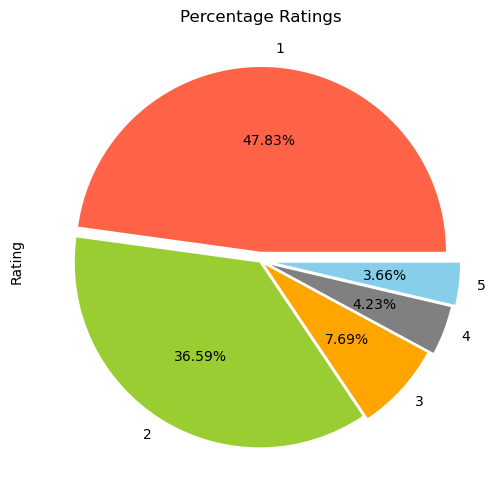

In [35]:
# Getting the Percentage Rating

df['Rating'].value_counts().plot(kind = 'pie', explode = [0.05, 0.01, 0.03, 0.06, 0.08],
                                labels = [1, 2, 3, 4, 5],
                                colors = ['tomato', 'yellowgreen', 'orange', 'grey', 'skyblue'],
                                autopct = '%1.2f%%', title = 'Percentage Ratings',
                                figsize = (14,6))
plt.show()

<strong>Observation</strong>
<p>
<li>1 has the highest review with 47.83%.</li>
<li>2 has a review of 36.59%.</li>
<li>3 has a review of 7.69%.</li>
<li>4 has a review of 4.23%, and </li>
<li>5 has a review of 3.66%.</li>
</p>

### Positive Review

In [36]:
# getting negative subset

positive_review = df.loc[(df['Rating'] > 3) & (df['compound'] > 0), :] 
positive_review

,Name,Title,Reviews,Rating,Date of Experience,compound,neg,neu,pos,processed review
1,Frances,Overall a great experience and glad we…,Overall a great experience and glad we booked ...,5,2023-04-07,0.9621,0.034,0.662,0.305,"[overall, great, experience, glad, booked, las..."
2,赵磊,A decent traveling agency,I felt a bit surprised when I saw lastminute.c...,5,2023-05-22,0.9310,0.068,0.661,0.271,"[felt, bit, surprised, saw, lastminute, com, l..."
3,Ola Zaid,A follow-up email would be good!,It would have been helpful for Lastminute.com ...,4,2023-05-19,0.6239,0.000,0.911,0.089,"[would, helpful, lastminute, com, send, confir..."
12,customer,Passengers keen to be prompt and on…,Passengers keen to be prompt and on board for ...,5,2023-05-18,0.2023,0.082,0.839,0.079,"[passenger, keen, prompt, board, flight, back,..."
18,Joe,Got a decent deal,"Got a decent deal, app was easy enough to use....",4,2023-05-18,0.7003,0.000,0.854,0.146,"[got, decent, deal, app, easy, enough, use, ch..."
...,...,...,...,...,...,...,...,...,...,...
5953,Lance,Tickets to Cork,I booked the tickets to Cork through last minu...,5,2022-04-11,0.6427,0.040,0.838,0.122,"[booked, ticket, cork, last, minute, comi, got..."
5956,Ayman Hassan Hassona Elshiekh,I booked my tickets through the site,I booked my tickets through the site. It was a...,4,2022-04-11,0.8832,0.000,0.705,0.295,"[booked, ticket, site, easy, process, clear, i..."
5960,Teresa Burston,Enjoyable trip,Flight was good both ways and hotel was in a g...,4,2022-04-10,0.9072,0.000,0.600,0.400,"[flight, good, way, hotel, great, position, wo..."
5965,Hind,Amazing hotel experience,Amazing hotel experience. Would highly recommend.,5,2022-04-10,0.7645,0.000,0.378,0.622,"[amazing, hotel, experience, would, highly, re..."


### Negative Review

In [37]:
# getting negative subset

negative_review = df.loc[(df['Rating'] < 3) & (df['compound'] <= 0), :] 
negative_review

,Name,Title,Reviews,Rating,Date of Experience,compound,neg,neu,pos,processed review
4,raj darji,I booked international flight ticket…,I booked international flight ticket from Last...,1,2023-05-23,-0.9524,0.258,0.742,0.000,"[booked, international, flight, ticket, last, ..."
5,CompleteSavings member,I got trasferred to last minute from…,I got trasferred to last minute from booking.c...,1,2023-05-23,-0.4389,0.138,0.744,0.118,"[got, trasferred, last, minute, booking, com, ..."
6,PJMBARCA,Warning. Never use this company,Never use this company. They will never refund...,1,2023-04-13,-0.5267,0.073,0.900,0.027,"[never, use, company, never, refund, eventuall..."
8,Jayne Adair,Failure to communicate,Last minute.com failed to pass on the airline ...,1,2023-05-17,-0.5719,0.121,0.839,0.040,"[last, minute, com, failed, pas, airline, noti..."
9,Borislav Pavlov,It actually costs more...,I booked international flight ticket from Last...,1,2023-05-22,-0.7838,0.149,0.851,0.000,"[booked, international, flight, ticket, last, ..."
...,...,...,...,...,...,...,...,...,...,...
5973,Michelle Morris,What a waste of time never will I book…,What a waste of time never will I book with yo...,1,2022-04-10,-0.4215,0.237,0.763,0.000,"[waste, time, never, book]"
5974,Anonymous,Customer service is very poor,n/a,1,2022-04-10,0.0000,0.000,1.000,0.000,[n]
5975,Kayleigh Grant,Terrible customer service,We have had a family bereavement and we now ha...,1,2022-04-09,-0.4514,0.050,0.917,0.033,"[family, bereavement, attend, funeral, tuesday..."
5976,Ariel Draper,Avoid at all costs!!!,The one and only good thing about this company...,1,2022-04-09,-0.8105,0.119,0.804,0.077,"[one, good, thing, company, payment, installme..."


# WordCloud
<p> Worcloud are graphical representation of word frequency.  They represent how often words are used.

In [38]:
# using Wordcloud to visualize our data
# creating wordcloud of negative reviews 

from wordcloud import WordCloud
neg_token = [word for review in negative_review['processed review'] for word in review]
wc_neg = WordCloud(background_color = 'grey', 
                   colormap = 'magma', 
                   width = 800, height = 400, 
                   random_state = 1,
                  collocations = False,
                  min_font_size = 10).generate_from_text(' '.join(neg_token))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

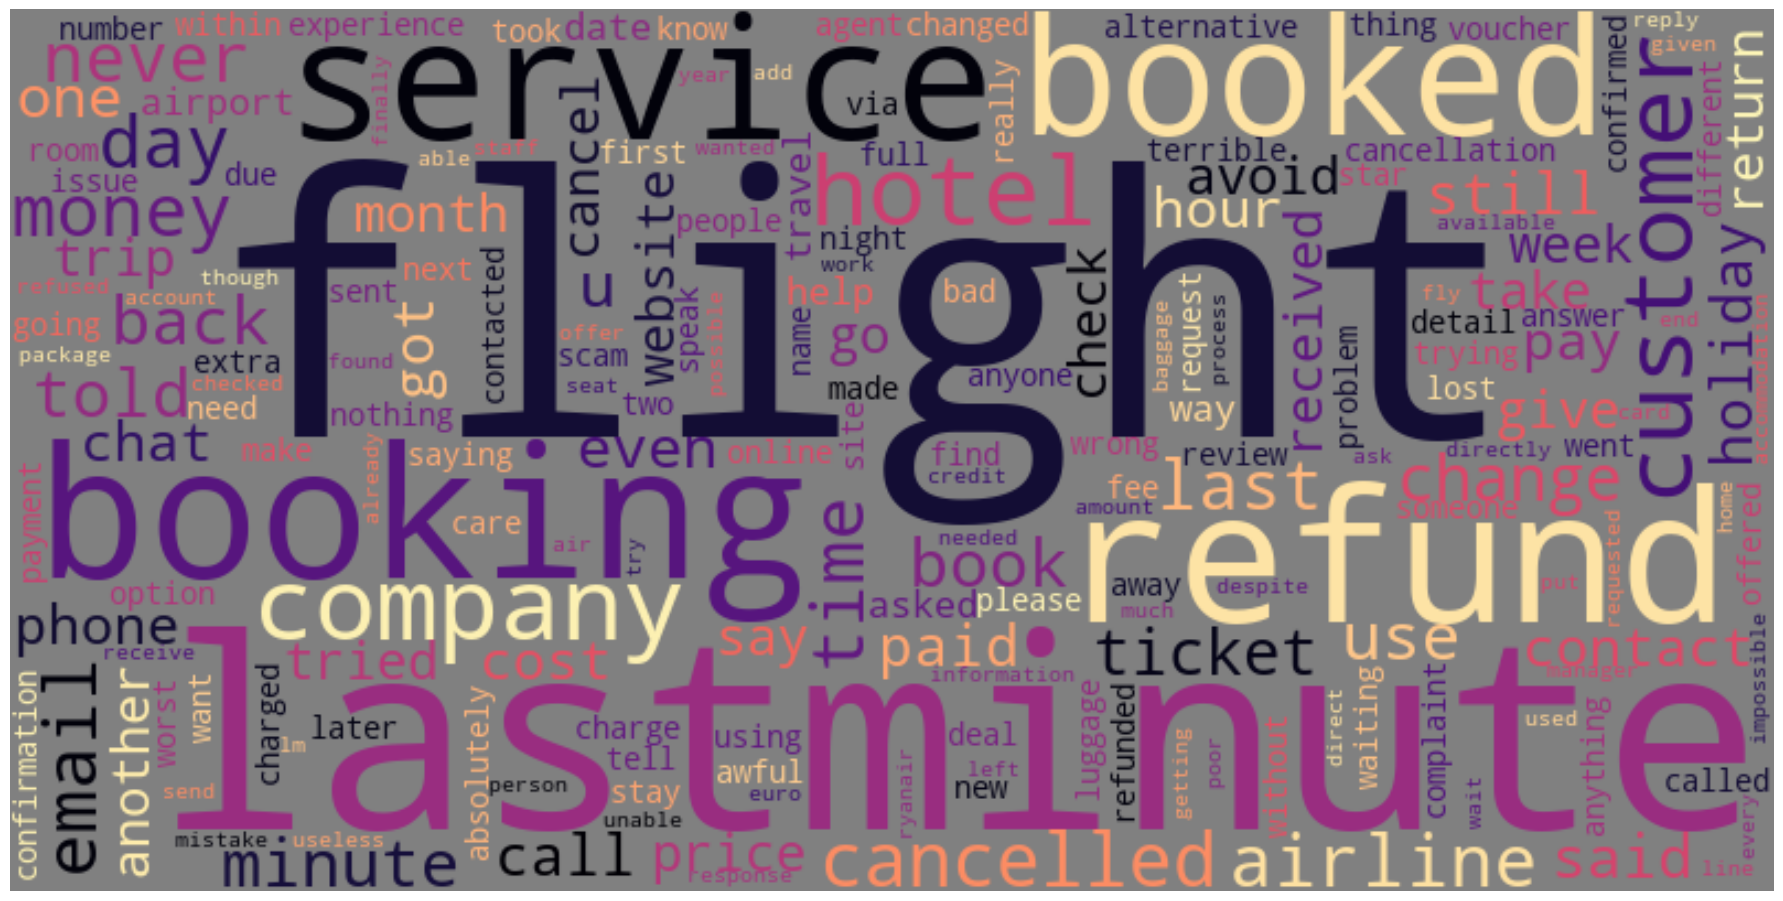

In [39]:
# visualizing the Negative Review

plt.figure(figsize = (18, 15))
plt.imshow(wc_neg, interpolation = 'bilinear', cmap = 'viridis')
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

In [40]:
len(neg_token)

117792

In [41]:
pos_token = [word for review in positive_review['processed review'] for word in review]
wc_pos = WordCloud(background_color = 'grey', 
                   colormap = 'rainbow', 
                   width = 800, height = 400, 
                   random_state = 1,
                  collocations = False,
                  min_font_size = 10).generate_from_text(' '.join(pos_token))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

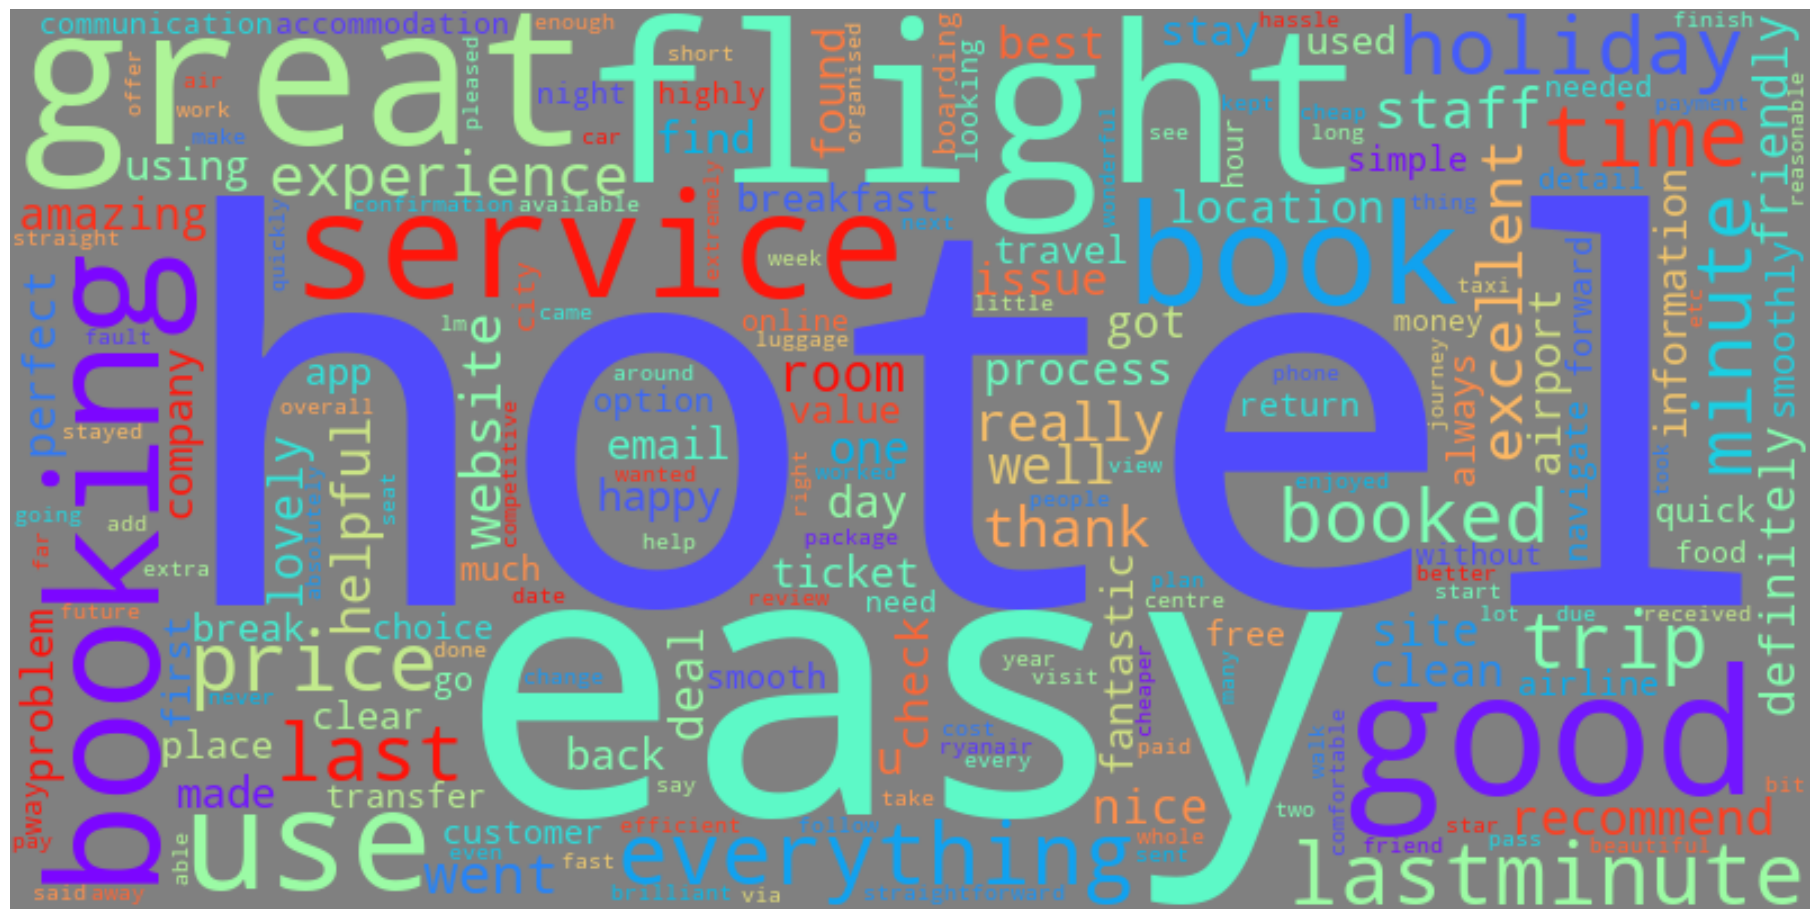

In [42]:
## Visualizing the Positive Wordcloud

plt.figure(figsize = (18, 15))
plt.imshow(wc_pos, interpolation = 'bilinear', cmap = 'rainbow')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [43]:
len(pos_token)

28053

### Frequency Distribution
<p> Frequency Distribution is used to determine the most frequent words used.

In [44]:
from nltk.probability import FreqDist

In [45]:
# frequent word used in positive review

pos_freqDist = FreqDist(pos_token)
pos_freqDist.tabulate(10)

     hotel       easy     flight      great       good    booking    service       book        use everything 
       697        695        613        608        498        393        348        317        314        302 


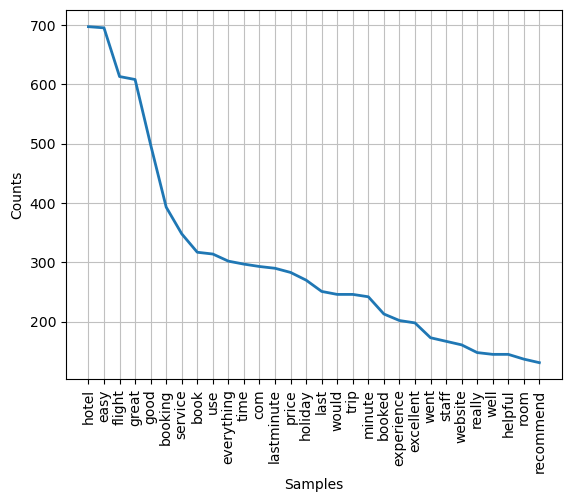

<IPython.core.display.Javascript object>

In [46]:
pos_freqDist.plot(30, cumulative = False)
plt.show()

In [47]:
# frequent word used in negative review

neg_freqDist = FreqDist(neg_token)
neg_freqDist.tabulate(10)

    flight lastminute    booking     refund        com    service     booked    company   customer      hotel 
      3070       1404       1370       1360       1174       1162       1087       1060        988        946 


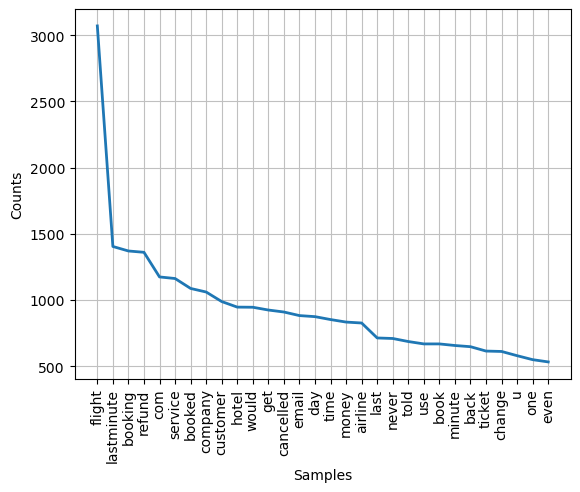

<IPython.core.display.Javascript object>

In [48]:
neg_freqDist.plot(30, cumulative = False)
plt.show()

# Findings

<p>From sentiment predictions obtained from the customer reviews on Trustpilot, it is evident that majority of Last Minute 
customers are not happy with the services on offer. This should definitely be a cause of concern for business.
With further deep dive, i was able to gather the list of issues that Last Minute’s customer support team need to pick up as soon as possible, to ensure customers revisit:</p>
<ol>
<li> Flight  Delay / Flight Bookings and Flight Cancellation.</li>
<li> Refund policy.</li>
<li> Improved Customer service.</li>
<li> Price review.</li>
<li> Communication Ethiques.</li>
<li> Hotel and Ticket Reservations.</li>
    </ol>

# Conclusion

<p> Data collected from just a website doesn't represent the opinion/sentiments of a company or business entity. I would work more on extracting from multiple website, combine the values to get a tangible results. 